In [79]:
import pandas as pd
import numpy as np

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

tables = pd.read_html(url)

gdp_data = tables[2]

gdp_data.head()


Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [80]:
current_columns= [( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')]
new_columns= [
    'Country',
    'MVF_Forecast',
    'MVF_Year',
    'WorldBank_Estimate',
    'WorldBank_Year',
    'OON_Estimate',
    'OON_Year',
]
gdp_data.columns=new_columns
gdp_data=gdp_data.drop(index=[0])

gdp_data.head()

,Country,MVF_Forecast,MVF_Year,WorldBank_Estimate,WorldBank_Year,OON_Estimate,OON_Year
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022
5,India,3937011,2024,3549919,2023,3465541,2022


In [81]:
print(gdp_data.shape)

(209, 7)


In [82]:
print(gdp_data.columns)


Index(['Country', 'MVF_Forecast', 'MVF_Year', 'WorldBank_Estimate',
       'WorldBank_Year', 'OON_Estimate', 'OON_Year'],
      dtype='object')


In [83]:
gdp_data = gdp_data.drop(gdp_data.columns[[2, 4, 6]], axis=1)
gdp_data.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']
print(gdp_data.head())

         Country  MVF_2024 WorldBank_2023  OON_2022
1  United States  28781083       27360935  25744100
2          China  18532633       17794782  17963170
3        Germany   4591100        4456081   4076923
4          Japan   4110452        4212945   4232173
5          India   3937011        3549919   3465541


In [84]:
print(gdp_data.dtypes)

Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object


In [85]:
gdp_data.replace("—", np.nan, inplace=True)
print(gdp_data.isnull().sum())


Country            0
MVF_2024          15
WorldBank_2023     8
OON_2022           1
dtype: int64


In [86]:
gdp_data['MVF_2024'] = pd.to_numeric(gdp_data['MVF_2024'], errors='coerce')
gdp_data['WorldBank_2023'] = pd.to_numeric(gdp_data['WorldBank_2023'], errors='coerce')
gdp_data['OON_2022'] = pd.to_numeric(gdp_data['OON_2022'], errors='coerce')

mvf_mean = gdp_data['MVF_2024'].mean()
wb_mean = gdp_data['WorldBank_2023'].mean()
oon_mean = gdp_data['OON_2022'].mean()

gdp_data['MVF_2024'].fillna(mvf_mean, inplace=True)
gdp_data['WorldBank_2023'].fillna(wb_mean, inplace=True)
gdp_data['OON_2022'].fillna(oon_mean, inplace=True)

print(gdp_data.isnull().sum())

Country           0
MVF_2024          0
WorldBank_2023    0
OON_2022          0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_7644\1821757794.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdp_data['MVF_2024'].fillna(mvf_mean, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_7644\1821757794.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [87]:
gdp_data.drop_duplicates(inplace=True)

In [88]:
gdp_data.describe()

,MVF_2024,WorldBank_2023,OON_2022
count,2.090000e+02,2.090000e+02,2.090000e+02
mean,5.644339e+05,5.178115e+05,4.811087e+05
std,2.435307e+06,2.325859e+06,2.236743e+06
min,6.600000e+01,6.200000e+01,5.900000e+01
25%,1.446700e+04,1.043800e+04,8.772000e+03
50%,5.631000e+04,4.320500e+04,3.171700e+04
75%,4.099890e+05,3.355330e+05,2.371010e+05
max,2.878108e+07,2.736094e+07,2.574410e+07


In [89]:
gdp_data['Difference'] = gdp_data['MVF_2024'] - gdp_data['WorldBank_2023']
max_difference = gdp_data.loc[gdp_data['Difference'].idxmax()]
print(max_difference)

Country           United States
MVF_2024             28781083.0
WorldBank_2023       27360935.0
OON_2022             25744100.0
Difference            1420148.0
Name: 1, dtype: object


In [90]:
gdp_data[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()


,MVF_2024,WorldBank_2023,OON_2022
MVF_2024,1.000000,0.998216,0.997244
WorldBank_2023,0.998216,1.000000,0.998610
OON_2022,0.997244,0.998610,1.000000


In [91]:
gdp_data[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()


MVF_2024          564433.932990
WorldBank_2023    517811.472637
OON_2022          481108.673077
dtype: float64

In [92]:
gdp_data['Std_Deviation'] = gdp_data[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)
max_std = gdp_data.loc[gdp_data['Std_Deviation'].idxmax()]
print(max_std)


Country            United States
MVF_2024              28781083.0
WorldBank_2023        27360935.0
OON_2022              25744100.0
Difference             1420148.0
Std_Deviation     1519552.648063
Name: 1, dtype: object


In [93]:
print("Найвищий MVF_2024:", gdp_data.loc[gdp_data['MVF_2024'].idxmax()])
print("Найнижчий MVF_2024:", gdp_data.loc[gdp_data['MVF_2024'].idxmin()])


Найвищий MVF_2024: Country            United States
MVF_2024              28781083.0
WorldBank_2023        27360935.0
OON_2022              25744100.0
Difference             1420148.0
Std_Deviation     1519552.648063
Name: 1, dtype: object
Найнижчий MVF_2024: Country             Tuvalu
MVF_2024              66.0
WorldBank_2023        62.0
OON_2022              59.0
Difference             4.0
Std_Deviation     3.511885
Name: 209, dtype: object


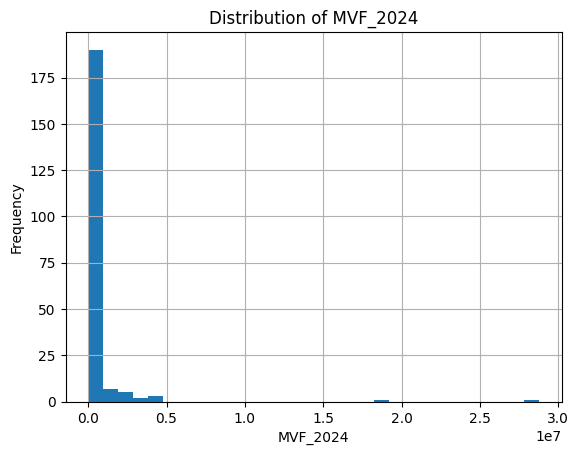

In [94]:
import matplotlib.pyplot as plt

gdp_data['MVF_2024'].hist(bins=30)
plt.title('Distribution of MVF_2024')
plt.xlabel('MVF_2024')
plt.ylabel('Frequency')
plt.show()

In [95]:
gdp_data['Share_MVF_2024'] = (gdp_data['MVF_2024'] / gdp_data['MVF_2024'].sum()) * 100
gdp_data['Share_WorldBank_2023'] = (gdp_data['WorldBank_2023'] / gdp_data['WorldBank_2023'].sum()) * 100
gdp_data['Share_OON_2022'] = (gdp_data['OON_2022'] / gdp_data['OON_2022'].sum()) * 100

gdp_data['Change_2023_2024'] = gdp_data['Share_MVF_2024'] - gdp_data['Share_WorldBank_2023']
gdp_data['Change_2022_2023'] = gdp_data['Share_WorldBank_2023'] - gdp_data['Share_OON_2022']

gdp_data[['Country', 'Share_MVF_2024', 'Share_WorldBank_2023', 'Share_OON_2022', 'Change_2023_2024', 'Change_2022_2023']]


,Country,Share_MVF_2024,Share_WorldBank_2023,Share_OON_2022,Change_2023_2024,Change_2022_2023
1,United States,24.397635,25.282090,25.602846,-0.884455,-0.320755
2,China,15.710056,16.442760,17.864609,-0.732704,-1.421849
3,Germany,3.891861,4.117514,4.054554,-0.225653,0.062961
4,Japan,3.484417,3.892851,4.208952,-0.408434,-0.316100
5,India,3.337392,3.280201,3.446526,0.057191,-0.166325
...,...,...,...,...,...,...
205,Kiribati,0.000264,0.000258,0.000222,0.000006,0.000036
206,Palau,0.000261,0.000243,0.000224,0.000018,0.000019
207,Marshall Islands,0.000259,0.000262,0.000277,-0.000004,-0.000015
208,Nauru,0.000136,0.000142,0.000146,-0.000006,-0.000004


Висновок: Великі економіки, такі як США, Китай і Японія, демонструють тенденцію до зменшення часток у загальному світовому ВВП з кожним роком.
Індія і деякі менші країни демонструють стабільність або незначне зростання.
Менші країни мають мінімальні коливання часток, але загалом демонструють стабільний внесок.

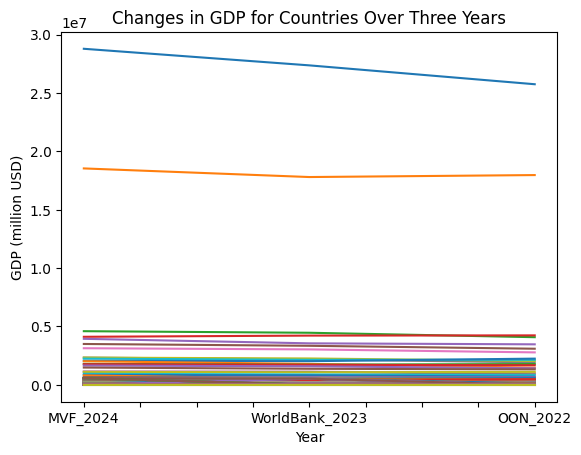

In [96]:
gdp_data.set_index('Country')[['MVF_2024', 'WorldBank_2023', 'OON_2022']].T.plot(legend=False)
plt.title('Changes in GDP for Countries Over Three Years')
plt.xlabel('Year')
plt.ylabel('GDP (million USD)')
plt.show()

Стабільне зростання спостерігається в країнах з невеликим економічним внеском, таких як Індія та деякі малі держави.
Стабільний спад характерний для великих економік, таких як США, Китай, і Японія.
Стабільність із мінімальними коливаннями спостерігається у деяких середніх та малих економік.